# Reference

Class Handout, Lee, Chia Jung professor, MDM64001, School of Big
Data Management, Soochow University

# Data

In [3]:
import pandas as pd


names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
       'marital-status', 'occupation', 'relationship', 'race', 'sex', 
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data = pd.read_csv(r'C:\Users\user\Desktop\git_hub\finished\ml\EDA\data\adult.csv', header = None, names = names)

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.shape

(32561, 15)

In [6]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

# Type

In [9]:
import numpy as np


types = data.dtypes
print(np.unique(types), '\n')
for i in np.unique(types):
    print(str(i), ':')
    print(types[types == i].index, '\n')

[dtype('int64') dtype('O')] 

int64 :
Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object') 

object :
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object') 



# EDA

### Pie Chart

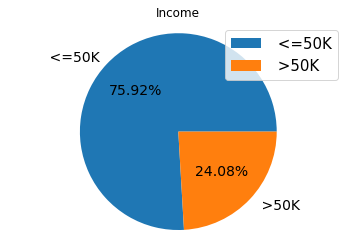

In [11]:
import matplotlib.pyplot as plt


data['income'].describe()
sta = data.groupby(['income'])['income'].agg(['count'])
plt.figure()
plt.pie(sta['count'].values,
        labels = sta.index.values,
        autopct = '%1.2f%%',
        textprops = {"fontsize" : 14})
plt.legend(loc = "upper right",prop={'size': 15})
plt.axis('equal')
plt.title('Income')
plt.show()

### Groupby

In [14]:
def Q1(x):
    s = x.describe()
    return s.loc['25%']

def Q3(x):
    s = x.describe()
    return s.loc['75%']

def QD(x):
    s = x.describe()
    qd = s.loc['75%'] - s.loc['25%']
    return qd


data.groupby(['income'])['hours-per-week'].agg(['count', 'mean', 'std', 
                                                       'min', Q1, 'median', Q3, 
                                                       'max', QD])

,count,mean,std,min,Q1,median,Q3,max,QD
income,,,,,,,,,
<=50K,24720,38.840210,12.318995,1,35,40,40,99,5
>50K,7841,45.473026,11.012971,1,40,40,50,99,10


In [17]:
from scipy import stats


def mode(x):
    mode = stats.mode(x)[0][0]
    return mode


data.groupby(['sex'])['education'].agg([mode, 'count'])

,mode,count
sex,,
Female,HS-grad,10771
Male,HS-grad,21790


In [19]:
sta2 = data.groupby(['education', 'sex'])['sex'].agg(['count'])
print(sta2, '\n')
print(sta2.loc[(' 10th')])

                       count
education     sex           
 10th          Female    295
               Male      638
 11th          Female    432
               Male      743
 12th          Female    144
               Male      289
 1st-4th       Female     46
               Male      122
 5th-6th       Female     84
               Male      249
 7th-8th       Female    160
               Male      486
 9th           Female    144
               Male      370
 Assoc-acdm    Female    421
               Male      646
 Assoc-voc     Female    500
               Male      882
 Bachelors     Female   1619
               Male     3736
 Doctorate     Female     86
               Male      327
 HS-grad       Female   3390
               Male     7111
 Masters       Female    536
               Male     1187
 Preschool     Female     16
               Male       35
 Prof-school   Female     92
               Male      484
 Some-college  Female   2806
               Male     4485 

         cou

### Bar Chart

In [20]:
df_edu = pd.DataFrame(np.unique(data['education']), columns = ['education'])
for sex in np.unique(data['sex']):
    d = data.loc[data['sex'] == sex]
    ls = []
    for edu in df_edu['education']:
        num = d['education'].loc[d['education'] == edu].count()
        ls.append(num)
    df_edu[sex] = ls

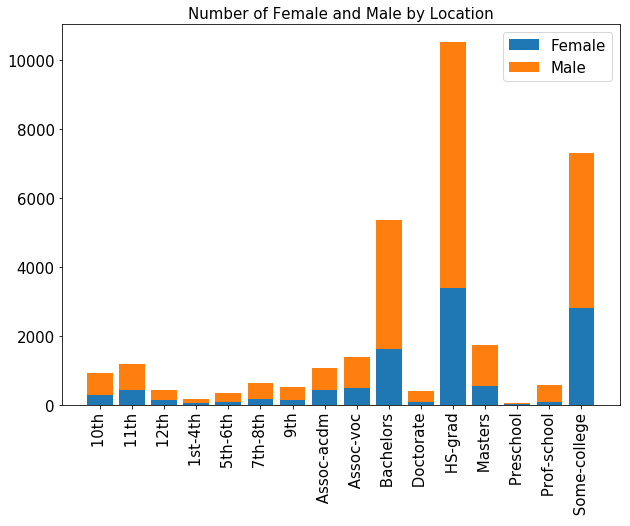

In [21]:
fontsize = 15
plt.rcParams['axes.titlesize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['axes.labelsize'] = fontsize
plt.figure(figsize=(10,7))
x = df_edu['education'].values
y1 = df_edu[' Female'].values
y2 = df_edu[' Male'].values
plt.bar(x, y1, label = 'Female')
plt.bar(x, y2, bottom = y1, label = 'Male')
plt.legend(prop={'size': 15})
plt.title('Number of Female and Male by Location')
#plt.yticks([])
locs, labels = plt.xticks() 
plt.setp(labels , rotation=90) 
plt.show()

### Scatter Plot

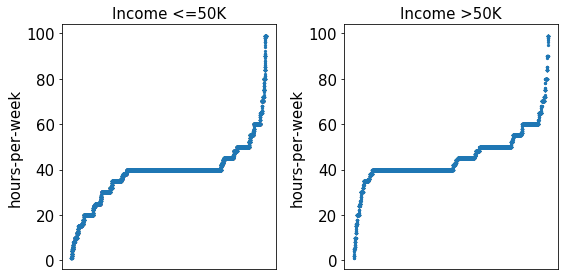

In [23]:
fontsize = 15
plt.rcParams['axes.titlesize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['axes.labelsize'] = fontsize
fig, sub = plt.subplots(1, 2, figsize = (8, 4))
for i, ax in zip(np.unique(data['income']), sub.flatten()):
    x = range(data['income'].loc[data['income'] == i].shape[0])
    y = np.sort(data.loc[data['income']== i]['hours-per-week'])
    ax.scatter(x, y, s = 5)
    ax.set_xticks([])
    ax.set_ylabel('hours-per-week')
    if i == ' <=50K':
        ax.set_title('Income <=50K')
    else:
        ax.set_title('Income >50K')
    plt.tight_layout()
plt.show()

### Correlation Matrix

In [24]:
df = data[['age', 'capital-gain', 'capital-loss', 'hours-per-week']]
round(df.corr(), 2)

,age,capital-gain,capital-loss,hours-per-week
age,1.00,0.08,0.06,0.07
capital-gain,0.08,1.00,-0.03,0.08
capital-loss,0.06,-0.03,1.00,0.05
hours-per-week,0.07,0.08,0.05,1.00


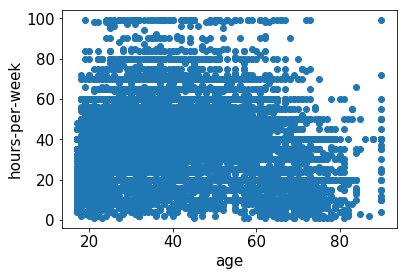

In [25]:
plt.figure()
plt.scatter(data['age'], data['hours-per-week'])
plt.xlabel('age')
plt.ylabel('hours-per-week')
plt.show()